## Sul fondale del Lago di Tovel - Codice utilizzato nello studio

##### **Marcella Colombari** - Febbraio 2023
 

### IDEE PER IL LAVORO
-Traduzione: come la impagino? \
-Ci sono correlazioni evidenti? E' quindi il caso di usare la regressione lineare o no? \
-Does the model fit? Then -> linear regression between T and time (eventualmente anche profondità con multiple regression) \
-Se ci sono degli outlier troppo evidenti (il MSE mean square error è troppo alto), usa anche la profondità \
1) train & test on the same set -training then testing- high training accuracy, low out of sample accuracy OVERFITTING RISK \
2) or train/test split approach, where the two sets are mutually exclusive: out of sample is more accurate, but test it bacwards too, to avoid risking to lose test results on valuable data \
3) k-fold cross validation solves it

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np
import scipy as stats
import os, types
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
import csv, sqlite3

In [3]:
'''try:
    b = int(input("Please enter a number to divide a"))
    a = a/b
    print("Success a=",a)
except:
    print("There was an error")
'''

'try:\n    b = int(input("Please enter a number to divide a"))\n    a = a/b\n    print("Success a=",a)\nexcept:\n    print("There was an error")\n'

# METHODOLOGY
-dati delle immersioni \
-temperatura, profondità e tempo \
-l'idea è usare la regressione lineare con profondità fissa, oppure la multipla (con anche la profondità) in caso di errore elevato \
-l'intero lavoro di analisi delle temperature nel tempo sarebbe reso molto più semplice da una sonda fissa posta a una determinata profondità, dove le problematiche sarebbero: 
1) Posizionamento (il problema è raggiungere la quota massima di -40m, oltre al fatto che va preferibilmente agganciata ad un albero piuttosto che al fondale)
2) Download dei dati (che avviene solo in maniera fisica, cioè recuperando la sonda con un'immersione, a causa dell'impossibilità di mettere una boa)
3) Quantità dei dati immagazzinabili e di conseguenza tempo tra un'immersione di recupero e l'altro
4) Attendibilità dei dati: la sonda potrebbe trovarsi su un punto particolarmente freddo o caldo in confronto al resto del lago, per effetto di micro condizioni locali (sorgenti, correnti ecc). Le immersioni ovviano in parte a questo problema, mantenendo però il problema della mancanza di dati sia nel tempo, sia a quelle profondità. Una soluzione potrebbe essere supportare il lavoro della sonda con alcune immersioni test dove viene verificato che la temperatura nel luogo della sonda sia omogenea con gli immediati dintorni

# CODE SECTION

In [4]:
df_2020r = pd.read_csv(r'E:\Program Files\Microsoft VS Code\Projects\2020.csv')
df_2020r

,dive number,date,time,sample time (min),sample depth (m),sample temperature (C),sample pressure (bar),sample heartrate
0,142.0,2020-02-15,10:51:00,0:05,1.5,10.3,NaN,NaN
1,142.0,2020-02-15,10:51:00,0:10,1.5,NaN,NaN,NaN
2,142.0,2020-02-15,10:51:00,0:15,1.6,NaN,NaN,NaN
3,142.0,2020-02-15,10:51:00,0:20,2.0,NaN,NaN,NaN
4,142.0,2020-02-15,10:51:00,0:25,2.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6322,NaN,2020-08-06,10:13:00,60:30,0.0,NaN,NaN,NaN
6323,NaN,2020-08-06,10:13:00,60:35,0.0,16.9,NaN,NaN
6324,NaN,2020-08-06,10:13:00,60:40,0.0,17.0,NaN,NaN
6325,NaN,2020-08-06,10:13:00,60:45,0.0,17.1,NaN,NaN


In [5]:
df_2021 = pd.read_csv(r'E:\Program Files\Microsoft VS Code\Projects\2021.csv')
df_2021

,dive number,date,time,sample time (min),sample depth (m),sample temperature (C),sample pressure (bar),sample heartrate
0,2,2021-08-23,09:43:00,0:02,3.02,NaN,NaN,NaN
1,2,2021-08-23,09:43:00,0:04,3.11,NaN,NaN,NaN
2,2,2021-08-23,09:43:00,0:06,3.18,NaN,NaN,NaN
3,2,2021-08-23,09:43:00,0:08,3.15,NaN,NaN,NaN
4,2,2021-08-23,09:43:00,0:10,3.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19371,16,2021-11-26,13:52:00,50:36,0.02,NaN,NaN,NaN
19372,16,2021-11-26,13:52:00,50:38,0.00,NaN,NaN,NaN
19373,16,2021-11-26,13:52:00,50:40,0.01,NaN,NaN,NaN
19374,16,2021-11-26,13:52:00,50:42,0.01,NaN,NaN,NaN


In [6]:
df_2022 = pd.read_csv(r'E:\Program Files\Microsoft VS Code\Projects\2022.csv')
df_2022

,dive number,date,time,sample time (min),sample depth (m),sample temperature (C),sample pressure (bar),sample heartrate
0,34,2022-04-29,13:06:00,0:02,3.47,NaN,NaN,NaN
1,34,2022-04-29,13:06:00,0:04,3.63,NaN,NaN,NaN
2,34,2022-04-29,13:06:00,0:06,3.75,NaN,NaN,NaN
3,34,2022-04-29,13:06:00,0:08,3.92,NaN,NaN,NaN
4,34,2022-04-29,13:06:00,0:10,4.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
34062,73,2022-10-28,15:12:00,66:54,0.01,NaN,NaN,NaN
34063,73,2022-10-28,15:12:00,66:56,0.01,NaN,NaN,NaN
34064,73,2022-10-28,15:12:00,66:58,0.01,NaN,NaN,NaN
34065,73,2022-10-28,15:12:00,67:00,0.04,NaN,NaN,NaN


## PIPELINE to clean the database (WORKING BUT NOT COMPLETE)
### Includes the list of custom functions

In [7]:
def Pipeline(a):
    print("Before cleaning the database was: ", a.shape, "large")

    # Function to delete NaN from the Temperature column(WORKING)

    def CleanNaN(a):
        a.dropna(subset = ["sample temperature (C)"], inplace=True)
        print("All temperature data without a value were excluded")

    # --------------------------------------------------------------------------------------------------------

    # Function to delete unnecessary columns from the database (WORKING)

    def CleanColumns(a):
        a.drop(["time", "sample time (min)","sample pressure (bar)","sample heartrate", "dive number"], axis=1, inplace=True)
        print("Unnecessary columns deleted")

    # --------------------------------------------------------------------------------------------------------

    # Function to delete depths shallower than 9m and deeper than 30m from the database (WORKING)

    def CleanDepth(a):
        dmin = 20.0
        dmax = 30.0
        #a = a.sort_values(by=["sample depth (m)"], ascending=True)
        a.drop(a.index[a["sample depth (m)"] < dmin], axis=0, inplace=True)
        a.drop(a.index[a["sample depth (m)"] >= dmax], axis=0, inplace=True)
        print("All data from depths shallower than 20m and deeper than 30m were excluded")
    
    # --------------------------------------------------------------------------------------------------------
    CleanNaN(a)
    CleanColumns(a)
    CleanDepth(a)
    print("Database cleaned, grouped and ready to be visualized")
    print("After cleaning the database is: ", a.shape, "large")
    
    #---------------------------------------------------------------------------------------------------------
    
    #Function to remove immersion data based on the months
    
    #---------------------------------------------------------------------------------------------------------
    
    #Function to append dataframes to a bigger dataframe with all the data

# Coding cells

### CAREFUL: This is the code to manually delete unwanted cells before the pipeline

In [8]:
df_2020 = df_2020r.loc[df_2020r["dive number"] != 142.0]
df_2020.head()

,dive number,date,time,sample time (min),sample depth (m),sample temperature (C),sample pressure (bar),sample heartrate
414,NaN,2020-06-13,09:36:00,0:05,3.0,11.1,NaN,NaN
415,NaN,2020-06-13,09:36:00,0:10,3.5,10.9,NaN,NaN
416,NaN,2020-06-13,09:36:00,0:15,4.0,10.8,NaN,NaN
417,NaN,2020-06-13,09:36:00,0:20,4.6,10.7,NaN,NaN
418,NaN,2020-06-13,09:36:00,0:25,4.9,10.6,NaN,NaN


## Pipeline to clean the dataframes

In [9]:
Pipeline(df_2020)
#df_2020.sort_values(by=["sample depth (m)"], ascending=True, inplace=True)
df_2020.head()

Before cleaning the database was:  (5913, 8) large
All temperature data without a value were excluded
Unnecessary columns deleted
All data from depths shallower than 20m and deeper than 30m were excluded
Database cleaned, grouped and ready to be visualized
After cleaning the database is:  (169, 3) large


C:\Users\Donna Arcama\AppData\Local\Temp\ipykernel_14584\3656137192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.dropna(subset = ["sample temperature (C)"], inplace=True)
F:\Programs\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
F:\Programs\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super

,date,sample depth (m),sample temperature (C)
1103,2020-06-28,20.1,7.9
1104,2020-06-28,20.8,7.6
1105,2020-06-28,21.7,7.5
1106,2020-06-28,22.3,7.4
1107,2020-06-28,23.2,7.3


In [10]:
Pipeline(df_2021)
#df_2021.sort_values(by=["sample depth (m)"], ascending=True, inplace=True)
df_2021.head()

Before cleaning the database was:  (19376, 8) large
All temperature data without a value were excluded
Unnecessary columns deleted
All data from depths shallower than 20m and deeper than 30m were excluded
Database cleaned, grouped and ready to be visualized
After cleaning the database is:  (106, 3) large


,date,sample depth (m),sample temperature (C)
2014,2021-09-08,20.28,8.8
2020,2021-09-08,20.56,8.7
2026,2021-09-08,21.00,8.6
2038,2021-09-08,20.40,8.5
2044,2021-09-08,20.50,8.4


In [11]:
Pipeline(df_2022)
#df_2022.sort_values(by=["sample depth (m)"], ascending=True, inplace=True)
df_2022.head()

Before cleaning the database was:  (34067, 8) large
All temperature data without a value were excluded
Unnecessary columns deleted
All data from depths shallower than 20m and deeper than 30m were excluded
Database cleaned, grouped and ready to be visualized
After cleaning the database is:  (211, 3) large


,date,sample depth (m),sample temperature (C)
1950,2022-05-03,20.46,6.3
1956,2022-05-03,20.97,6.2
1968,2022-05-03,21.83,6.1
1986,2022-05-03,22.92,6.0
1998,2022-05-03,23.28,5.9


Text(0.5, 1.0, 'Year 2020: Correlation between T and Depth')

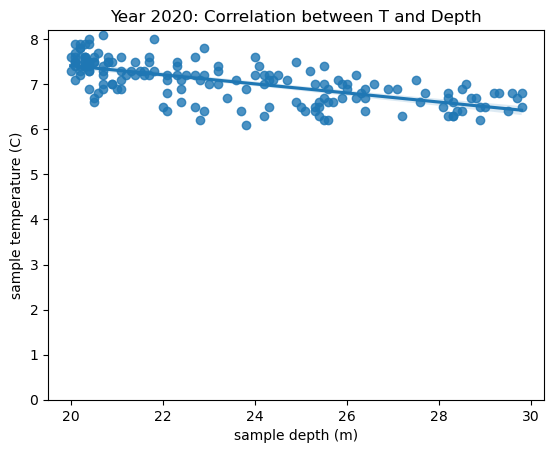

In [12]:
sns.regplot(x="sample depth (m)", y="sample temperature (C)", data = df_2020)
plt.ylim(0,)
plt.title("Year 2020: Correlation between T and Depth")

Text(0.5, 1.0, 'Year 2021: Correlation between T and Depth')

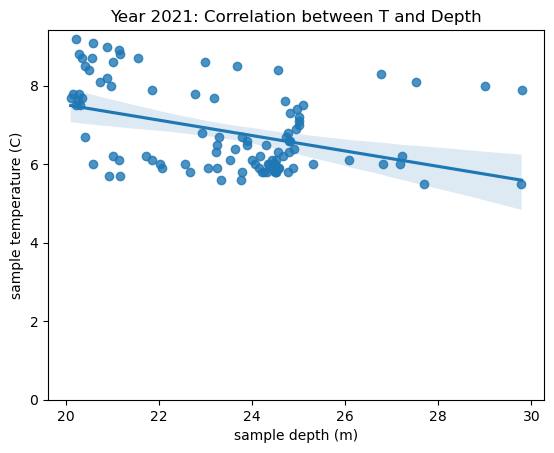

In [13]:
sns.regplot(x="sample depth (m)", y="sample temperature (C)", data = df_2021)
plt.ylim(0,)
plt.title("Year 2021: Correlation between T and Depth")

Text(0.5, 1.0, 'Year 2022: Correlation between T and Depth')

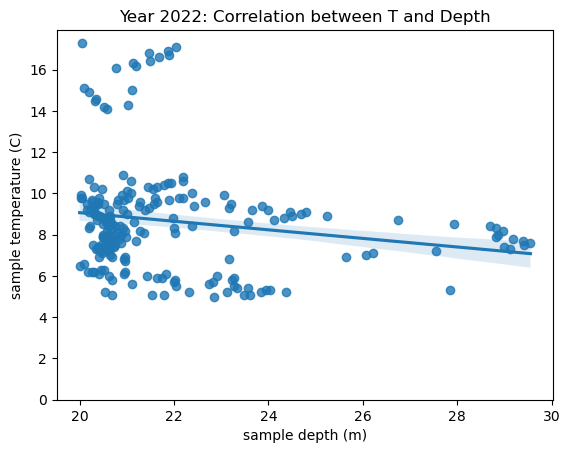

In [14]:
sns.regplot(x="sample depth (m)", y="sample temperature (C)", data = df_2022)
plt.ylim(0,)
plt.title("Year 2022: Correlation between T and Depth")

In [15]:
#pearson_coef, p_value = stats.pearsonr(df_2020["sample depth (m)"], df_2020["sample temperature (C)"])
pearson_coef = np.corrcoef(df_2020["sample depth (m)"], df_2020["sample temperature (C)"])
pearson_coef

array([[ 1.        , -0.65918901],
       [-0.65918901,  1.        ]])

In [16]:
df = pd.DataFrame()
df = df_2020.append(df_2021).append(df_2022)
df.shape
print(df.head())
print(df.tail())

            date  sample depth (m)  sample temperature (C)
1103  2020-06-28              20.1                     7.9
1104  2020-06-28              20.8                     7.6
1105  2020-06-28              21.7                     7.5
1106  2020-06-28              22.3                     7.4
1107  2020-06-28              23.2                     7.3
             date  sample depth (m)  sample temperature (C)
32463  2022-10-28             26.07                     7.0
32469  2022-10-28             25.65                     6.9
32487  2022-10-28             23.17                     6.8
32511  2022-10-28             20.68                     6.9
32529  2022-10-28             20.41                     6.9


In [17]:
df.reset_index(inplace=True)
df.head()

,index,date,sample depth (m),sample temperature (C)
0,1103,2020-06-28,20.1,7.9
1,1104,2020-06-28,20.8,7.6
2,1105,2020-06-28,21.7,7.5
3,1106,2020-06-28,22.3,7.4
4,1107,2020-06-28,23.2,7.3


In [18]:
df.reset_index(inplace=True)
df.head()

,level_0,index,date,sample depth (m),sample temperature (C)
0,0,1103,2020-06-28,20.1,7.9
1,1,1104,2020-06-28,20.8,7.6
2,2,1105,2020-06-28,21.7,7.5
3,3,1106,2020-06-28,22.3,7.4
4,4,1107,2020-06-28,23.2,7.3


In [19]:
pearson_coef = np.corrcoef(df["sample depth (m)"], df["sample temperature (C)"])
pearson_coef

array([[ 1.        , -0.30647451],
       [-0.30647451,  1.        ]])

Text(0.5, 1.0, 'Years 2020/2021/2022: Correlation between T and Depth')

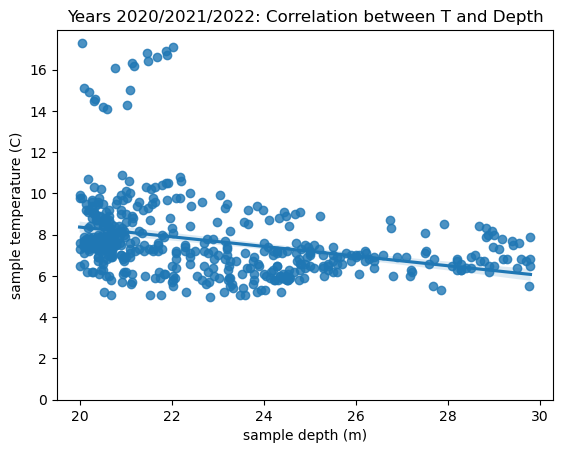

In [20]:
sns.regplot(x="sample depth (m)", y="sample temperature (C)", data = df)
plt.ylim(0,)
plt.title("Years 2020/2021/2022: Correlation between T and Depth")

Text(0.5, 1.0, 'Years 2020/2021/2022: Correlation between Time and Temperature')

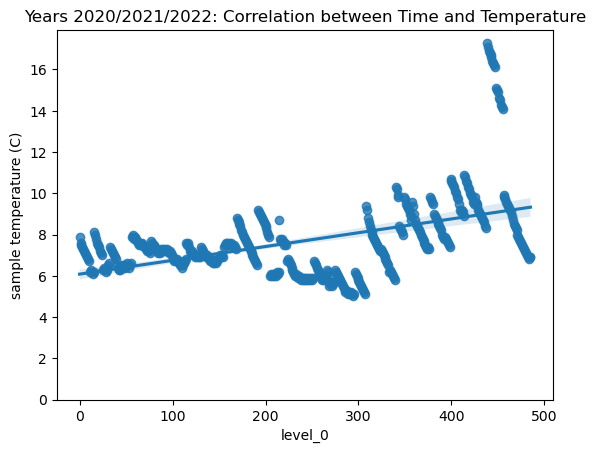

In [21]:
sns.regplot(x="level_0", y="sample temperature (C)", data = df)
plt.ylim(0,)
plt.title("Years 2020/2021/2022: Correlation between Time and Temperature")

In [22]:
lm = LinearRegression()
X = df[["level_0"]]
Y = df["sample temperature (C)"]
lm.fit(X,Y)

LinearRegression()

In [23]:
Yhat=lm.predict(X)
Yhat[0:5]

array([6.08034663, 6.08703749, 6.09372835, 6.10041921, 6.10711007])

In [24]:
lm.intercept_

6.080346625429902

In [25]:
lm.coef_

array([0.00669086])

In [26]:
Z = df[["level_0","sample depth (m)"]]
lm.fit(Z,df["sample temperature (C)"])
print("Intercept: ", lm.intercept_)
print("Coefficients: ", lm.coef_ )

Intercept:  10.016766713618106
Coefficients:  [ 0.00602613 -0.16528232]


In [27]:
Yhat = lm.predict(Z)

F:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


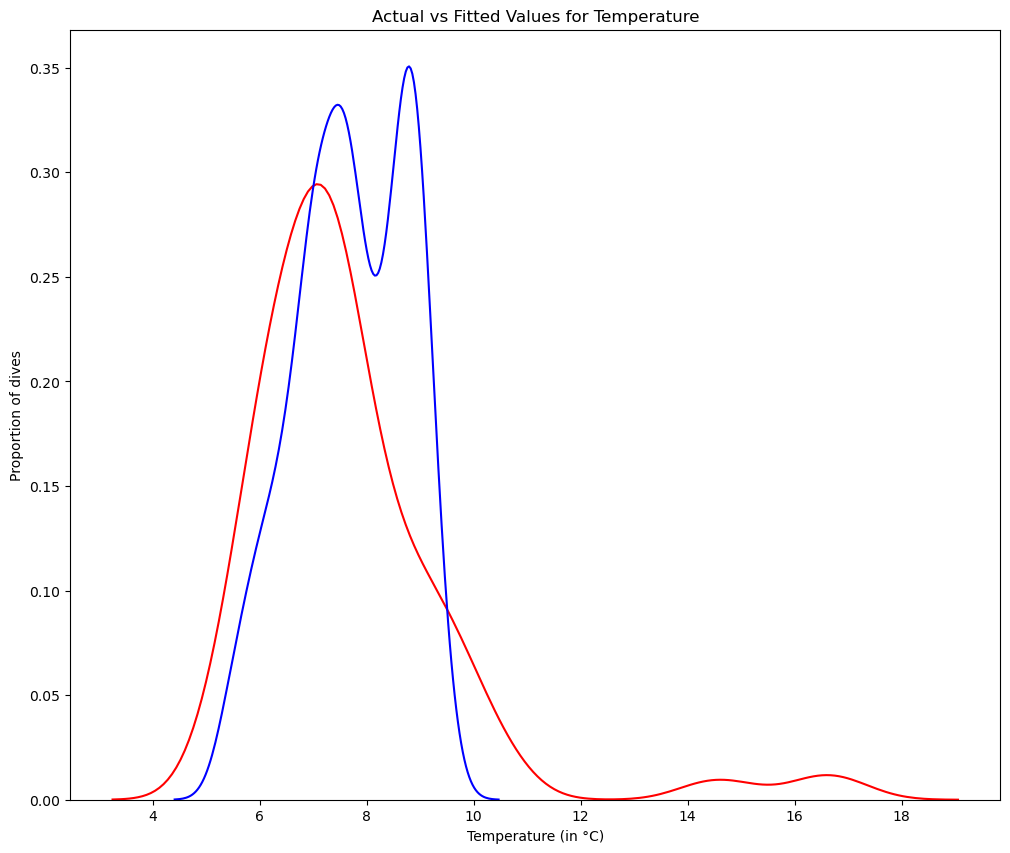

In [28]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['sample temperature (C)'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Temperature')
plt.xlabel('Temperature (in °C)')
plt.ylabel('Proportion of dives')

plt.show()
plt.close()